# Data Exploratory Analysis

In [49]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, labs, theme, theme_classic, facet_wrap, element_text
from plotnine import geom_histogram, geom_bar
import missingno as msno

In [3]:
campaign_ad = pd.read_csv("MLUnige2023_subscriptions_train.csv", index_col="Id")
campaign_ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8952 non-null   int64  
 1   job               8952 non-null   object 
 2   marital           8952 non-null   object 
 3   education         8952 non-null   object 
 4   device            8952 non-null   object 
 5   day               8952 non-null   int64  
 6   month             8952 non-null   int64  
 7   time_spent        8952 non-null   float64
 8   banner_views      8952 non-null   int64  
 9   banner_views_old  8952 non-null   int64  
 10  days_elapsed_old  8952 non-null   int64  
 11  outcome_old       8952 non-null   object 
 12  X1                8952 non-null   int64  
 13  X2                8952 non-null   int64  
 14  X3                8952 non-null   int64  
 15  X4                8952 non-null   float64
 16  subscription      8952 non-null   int64  
dtype

There apppear to be no missing values in dataset indentified by Python.
However, the columns

- `job`
- `education`
- `device`
- `outcome_old`

have missing values in the form of the string `'na'` and this can be seen within the output below.

In [4]:
campaign_ad

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,na,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,na,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,na,0,0,1,0.081456,1
8949,27,manager,single,grad_school,na,5,6,29.00,3,0,-1,na,0,0,1,0.079186,1


Therefore, we replace `na` with `nan` that will be recoginzed by Python.

In [5]:
campaign_ad.replace('na', np.nan, inplace=True)

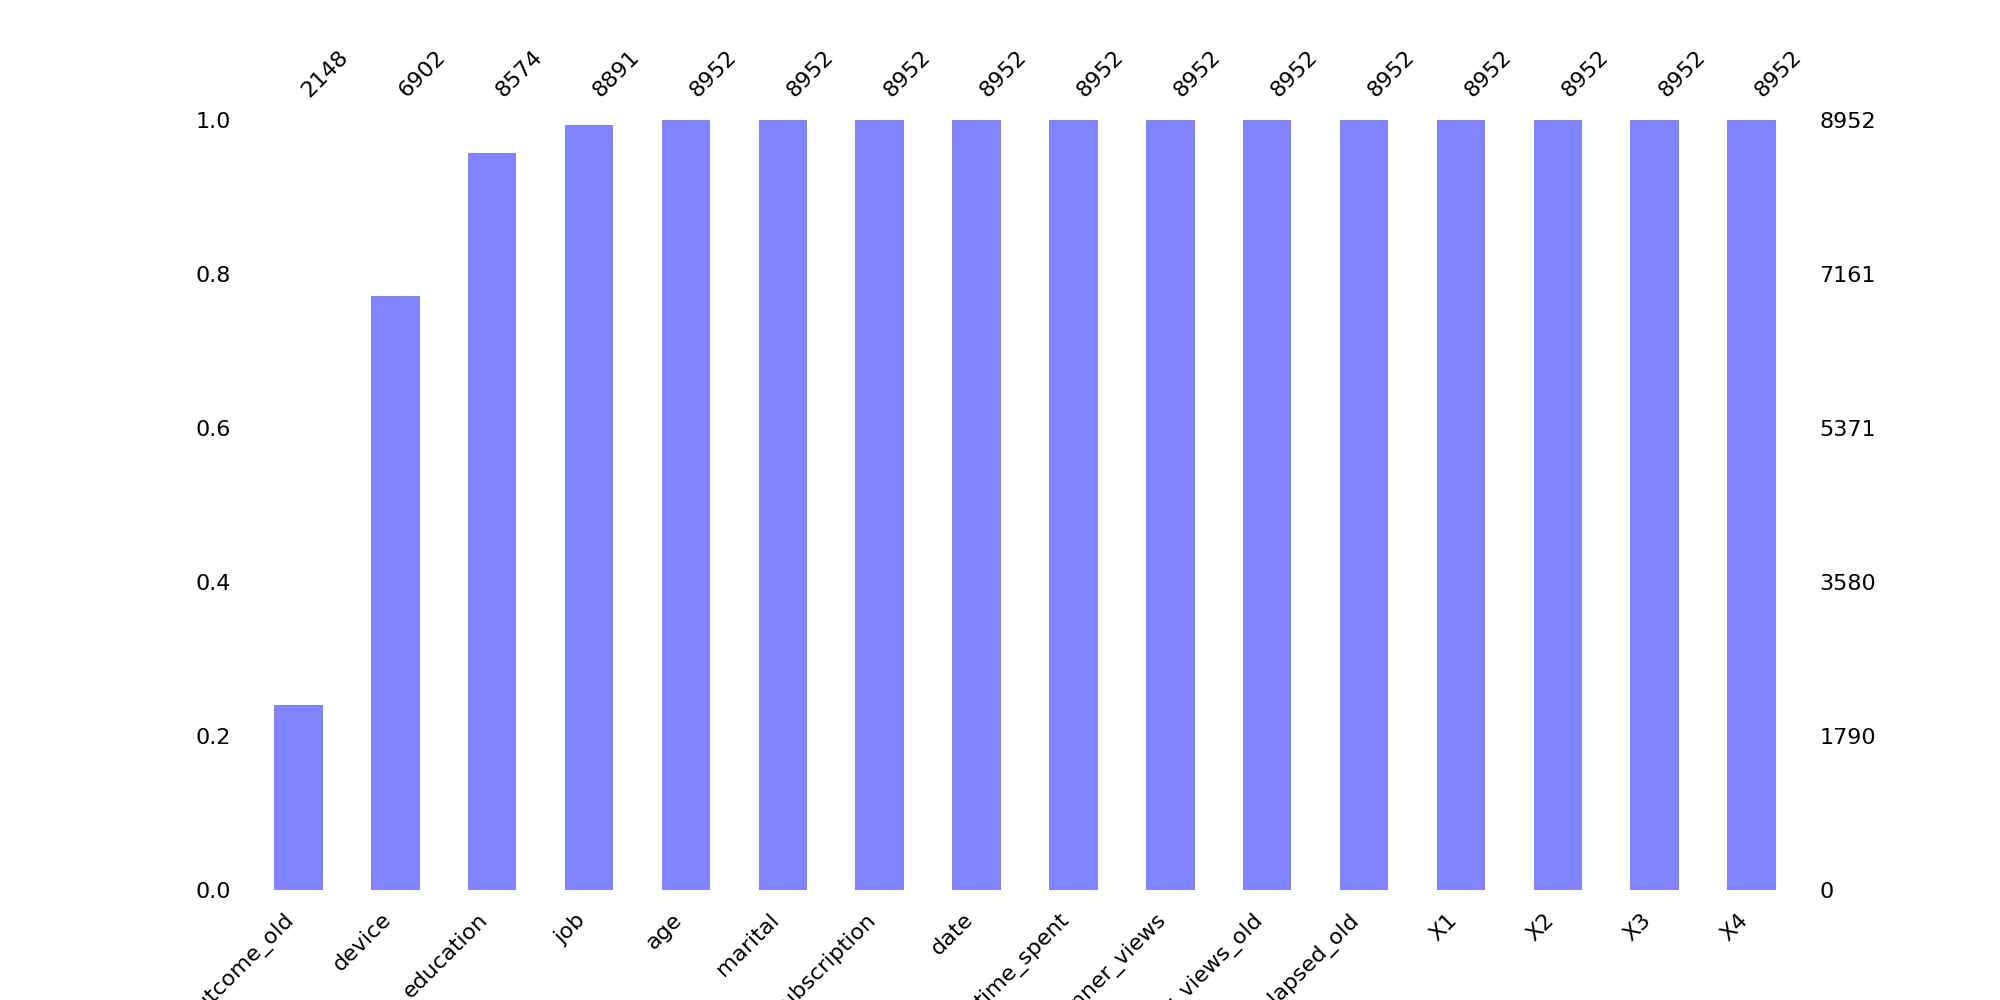

In [46]:
# Set the desired color
color = '#8183FF'  # Replace with your preferred color

msno.bar(campaign_ad, figsize = (10,5), fontsize = 8, color = color, sort = "ascending",);


Now, we can clearly see the respective missing values throughout the data set.


In addition, we noticed that `day` and `month` could be combined together underneath one date column which appears at the end of `campaign_ad`.


In [7]:
campaign_ad['date'] = [dt.date(2022, campaign_ad['month'][x], campaign_ad['day'][x]) for x in range(len(campaign_ad))]

In [8]:
campaign_ad.drop(columns=['day', 'month'], inplace=True)

In [10]:
# Position `date` where it was previously in the columns instead of at the end of the data set.
cols = list(campaign_ad.columns)
datecol = cols[-1]
cols[6:] = cols[5:len(cols)-1]
cols[5] = datecol

campaign_ad = campaign_ad[cols]
campaign_ad.head(5)

,age,job,marital,education,device,subscription,date,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4
Id,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,1,2022-02-04,26.80,3,4,196,failure,0,0,1,0.072803
1,48,industrial_worker,married,university,smartphone,1,2022-04-30,13.05,1,1,79,success,0,0,0,0.075454
2,27,teacher,married,university,smartphone,0,2022-07-14,8.10,3,0,-1,NaN,0,1,1,0.068110
3,44,unemployed,divorced,university,smartphone,0,2022-05-13,7.10,2,1,369,other,0,0,1,0.091942
4,29,manager,single,grad_school,smartphone,1,2022-04-26,15.90,2,2,143,success,0,0,0,0.085922


In [11]:
campaign_ad.describe()

,age,subscription,time_spent,banner_views,banner_views_old,days_elapsed_old,X1,X2,X3,X4
count,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,41.201743,0.416443,17.130306,2.540550,0.759160,49.403262,0.141086,0.013963,0.496984,0.086603
std,11.638321,0.492996,16.902741,2.824065,2.099277,107.365840,0.348129,0.117345,0.500019,0.030253
min,18.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,6.100000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.073891
50%,39.000000,0.000000,11.450000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.077661
75%,49.000000,1.000000,22.500000,3.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.087768
max,95.000000,1.000000,245.400000,63.000000,58.000000,854.000000,1.000000,1.000000,1.000000,0.810043


In [12]:
# Extract non-numerical predictors by mean and count
for col in campaign_ad.select_dtypes(exclude = "number").columns:
  print(campaign_ad[[col, "subscription"]].groupby(col, as_index = False).mean())
  print(campaign_ad[[col, "subscription"]].groupby(col, as_index = False).count())

                  job  subscription
0        entrepreneur      0.338290
1           freelance      0.450311
2         housekeeper      0.308642
3   industrial_worker      0.298204
4             manager      0.463907
5             retired      0.617597
6            salesman      0.323810
7             student      0.679856
8             teacher      0.431648
9          technology      0.394502
10         unemployed      0.519713
                  job  subscription
0        entrepreneur           269
1           freelance           322
2         housekeeper           243
3   industrial_worker          1670
4             manager          1981
5             retired           591
6            salesman           735
7             student           278
8             teacher          1068
9          technology          1455
10         unemployed           279
    marital  subscription
0  divorced      0.414725
1   married      0.382283
2    single      0.479100
    marital  subscription
0  div

The way one can interpret this table is by reviewing `entrepreneur` under job and looking at the `subscription` value, which corresponds to 33.8% probability that this indiviaul is subscribed. For example, `students` appear to have the highest average of customers who have a subscription at 68% within this category. Therefore, we can assume that the individuals who typically have the highest probability of having a subscription are the following: `students` who are `single` that went to `graduate school` and uses a `smartphone` where the outcome of the old (and related) online ads campaign as a `success`.

c:\Users\emann\anaconda3\lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


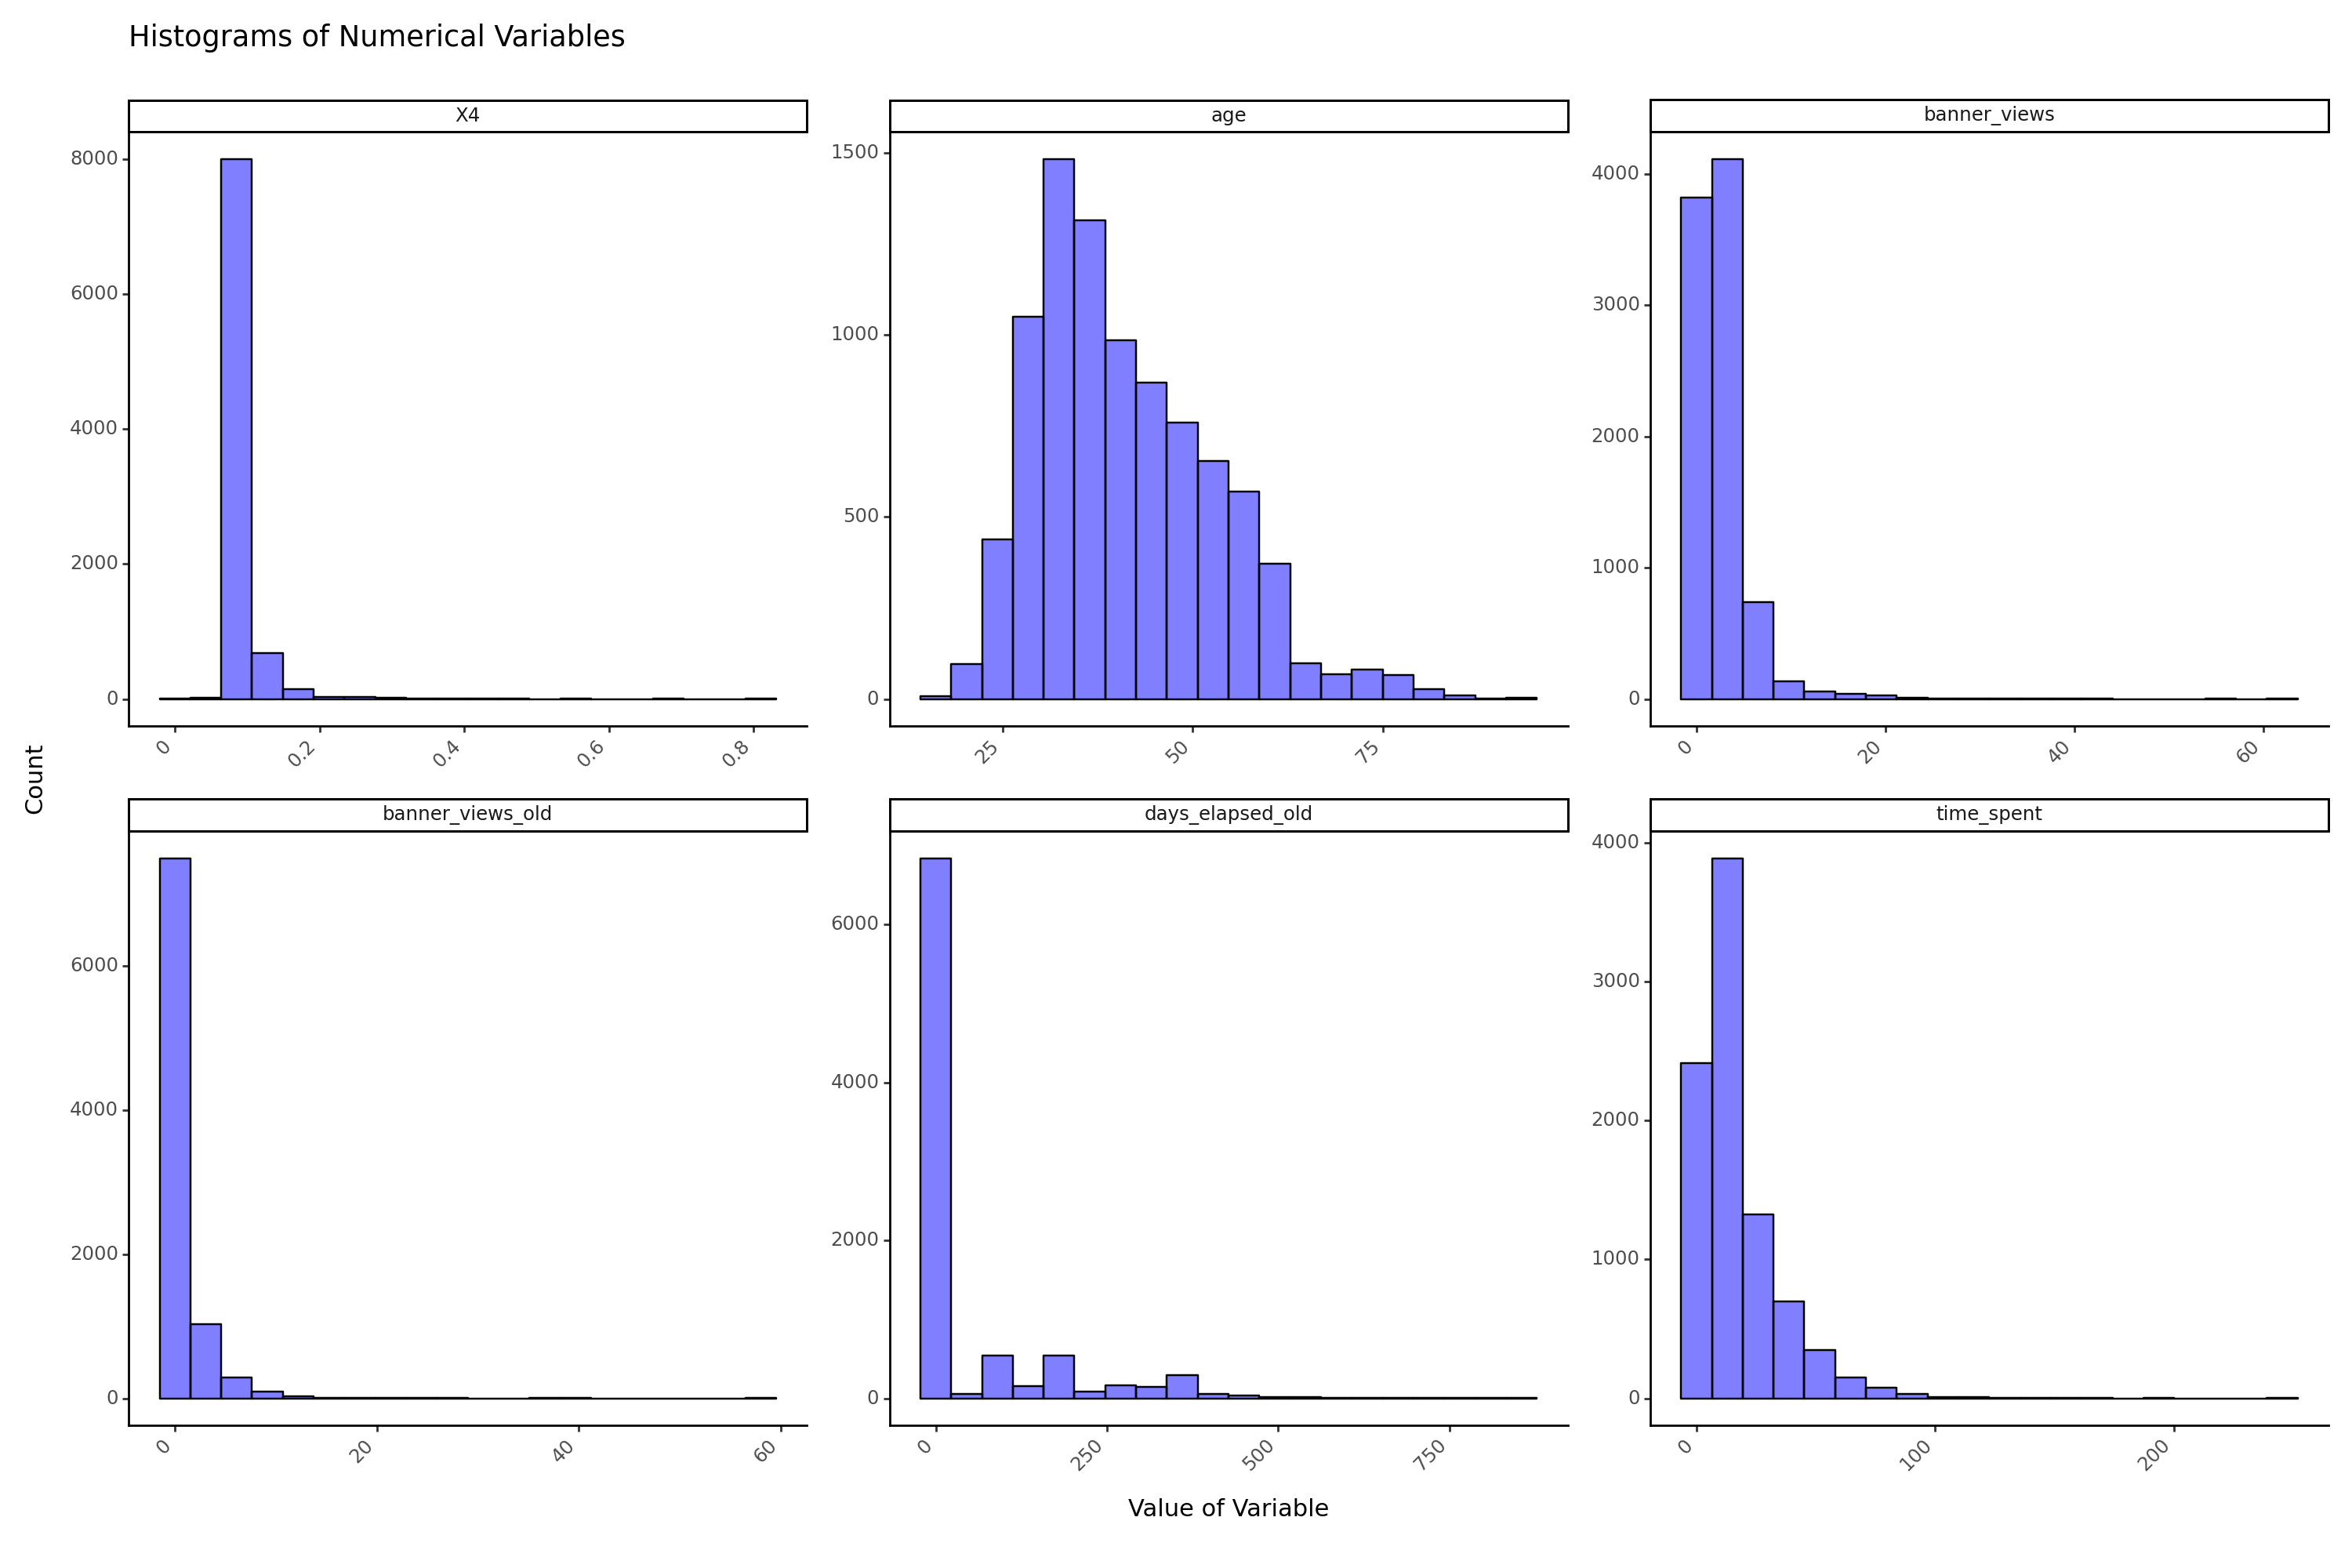

<Figure Size: (1500 x 1000)>

In [19]:
# Plot histogram for continuous variables to look at distribution
camp_num_melt = campaign_ad[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']].melt()

ggplot(camp_num_melt) + \
    aes('value') + \
    facet_wrap('variable', scales = 'free') + \
    geom_histogram(bins = 20, color = 'black', fill = 'blue', alpha = 0.5) + \
    theme_classic() + \
    theme(subplots_adjust = {'wspace': 0.5, 'hspace': 0.5}, 
          axis_text_x = element_text(rotation = 45, ha = 'right'),
          figure_size = (15, 10)) + \
    labs(title = 'Histograms of Numerical Variables',
         x = 'Value of Variable',
         y = 'Count')

It appears that all the continuous predictors are skewed. Therefore, we will need to transform these variables depending on the specific model.

c:\Users\emann\anaconda3\lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


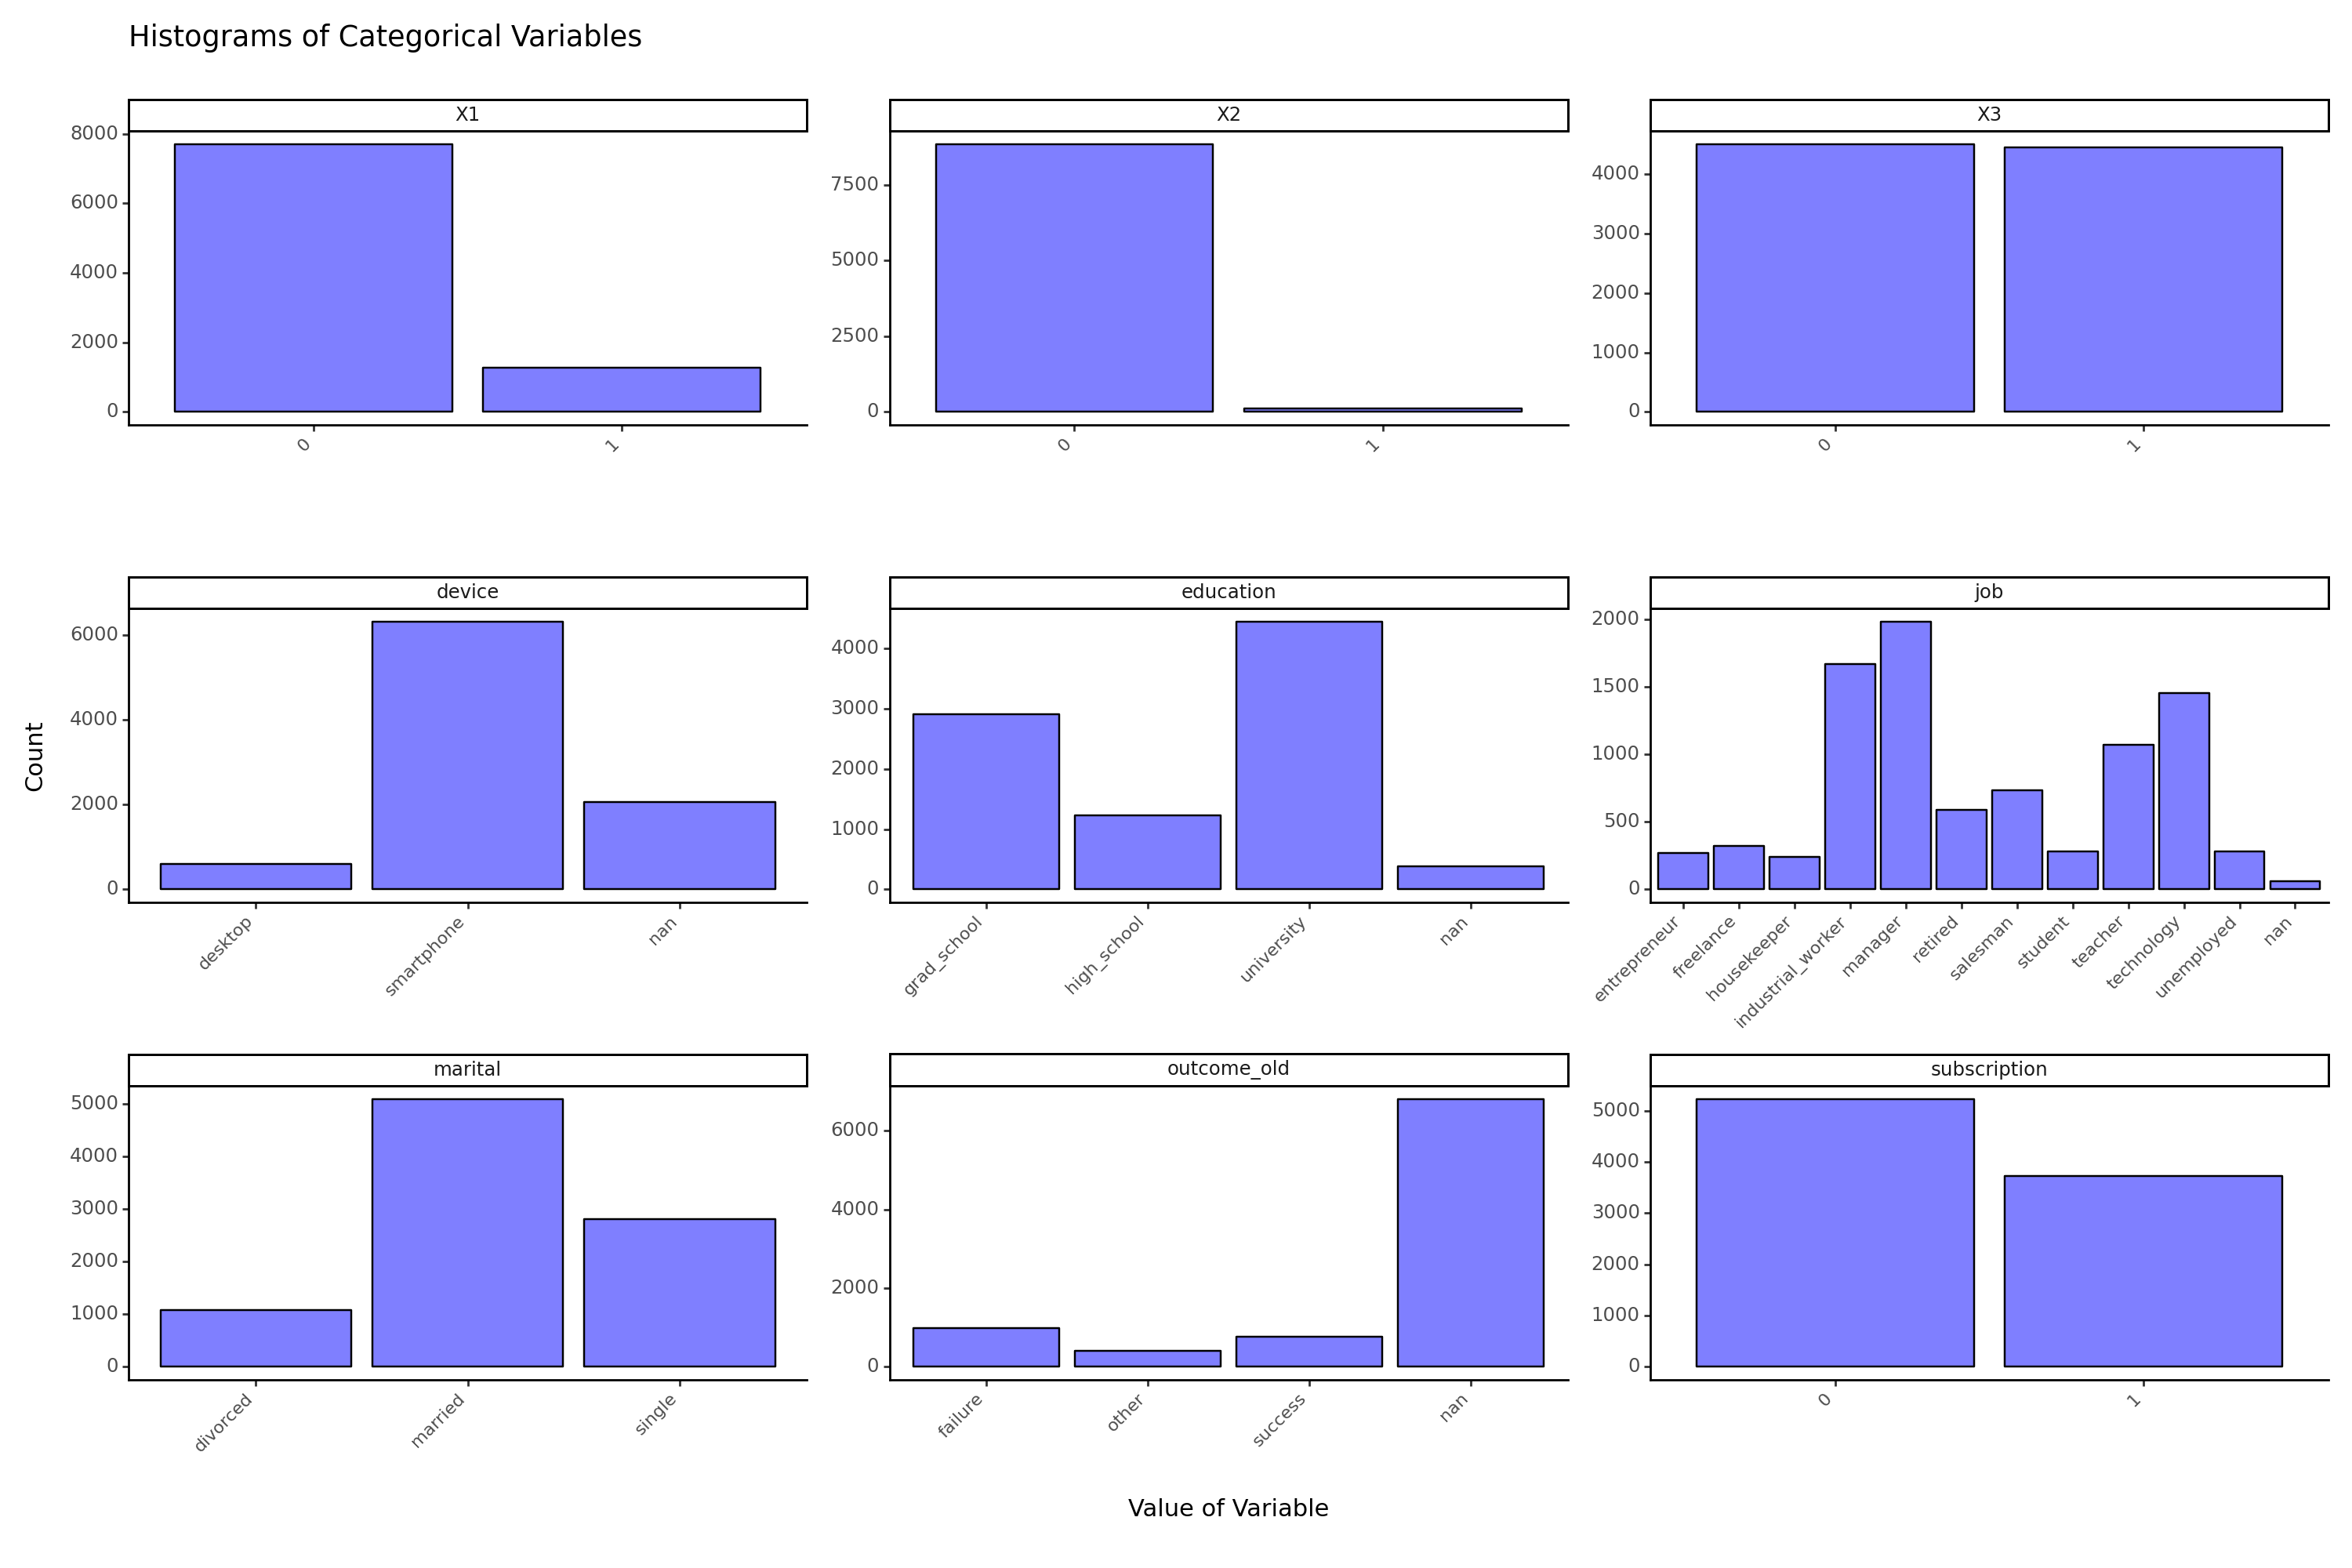

<Figure Size: (1500 x 1000)>

In [18]:
# Plot histogram for qualitative variables to look at distribution

camp_cat_melt = campaign_ad[['job', 'marital', 'education', 'device', 'outcome_old', 'X1', 'X2', 'X3', 'subscription']].melt()

ggplot(camp_cat_melt) + \
    aes('value') + \
    facet_wrap('variable', scales = 'free') + \
    geom_bar(fill = 'blue', color = 'black', alpha = 0.5) + \
    theme_classic() + \
    theme(subplots_adjust = {'wspace': 0.5, 'hspace': 0.5},
          axis_text_x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
          figure_size = (15, 10),
          axis_title_x = element_text(margin = {'t': 20})) + \
    labs(title = 'Histograms of Categorical Variables',
         x = 'Value of Variable',
         y = 'Count')

These bar charts help us visualize how the observations within the categorical predictors are distributed between their respective groupings. For instance, `married` under `marital` and `manager` have the most observations. By knowing this information, it may help later if missing value imputation is needed.

Since `outcome_old` had the highest number of missing values, we wanted to dive deeper to check how this relates to other predictors.

In [23]:
# Review only days_elapsed_old > -1, meaning that they have subscribed previously
campaign_old = campaign_ad.loc[campaign_ad["days_elapsed_old"] > -1, ]
campaign_old.describe()

,age,subscription,time_spent,banner_views,banner_views_old,days_elapsed_old,X1,X2,X3,X4
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,41.561657,0.626803,16.117869,1.901349,3.162401,208.962773,0.107957,0.004653,0.470917,0.089008
std,12.643756,0.483766,13.471045,1.361051,3.280375,120.495410,0.310399,0.068072,0.499270,0.035206
min,18.000000,0.000000,0.050000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.062708
25%,32.000000,0.000000,7.200000,1.000000,1.000000,99.000000,0.000000,0.000000,0.000000,0.074819
50%,38.000000,1.000000,12.250000,1.000000,2.000000,183.000000,0.000000,0.000000,0.000000,0.079449
75%,50.000000,1.000000,20.700000,2.000000,4.000000,300.000000,0.000000,0.000000,1.000000,0.091733
max,93.000000,1.000000,102.600000,11.000000,58.000000,854.000000,1.000000,1.000000,1.000000,0.810043


The mean of the `subscription` here is at 62.7% with `banner_views` less than 2. 

In [ ]:
campaign_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 8951
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2149 non-null   int64  
 1   job               2130 non-null   object 
 2   marital           2149 non-null   object 
 3   education         2062 non-null   object 
 4   device            2132 non-null   object 
 5   subscription      2149 non-null   int64  
 6   time_spent        2149 non-null   float64
 7   banner_views      2149 non-null   int64  
 8   banner_views_old  2149 non-null   int64  
 9   days_elapsed_old  2149 non-null   int64  
 10  outcome_old       2148 non-null   object 
 11  X1                2149 non-null   int64  
 12  X2                2149 non-null   int64  
 13  X3                2149 non-null   int64  
 14  X4                2149 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 268.6+ KB


Once again, we look at where there are missing values within that specific grouping. It is noticed that there is one `na` within `old_outcome` but all others have 2,149 rows that are complete with data. 

c:\Users\emann\anaconda3\lib\site-packages\plotnine\themes\themeable.py:1902: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


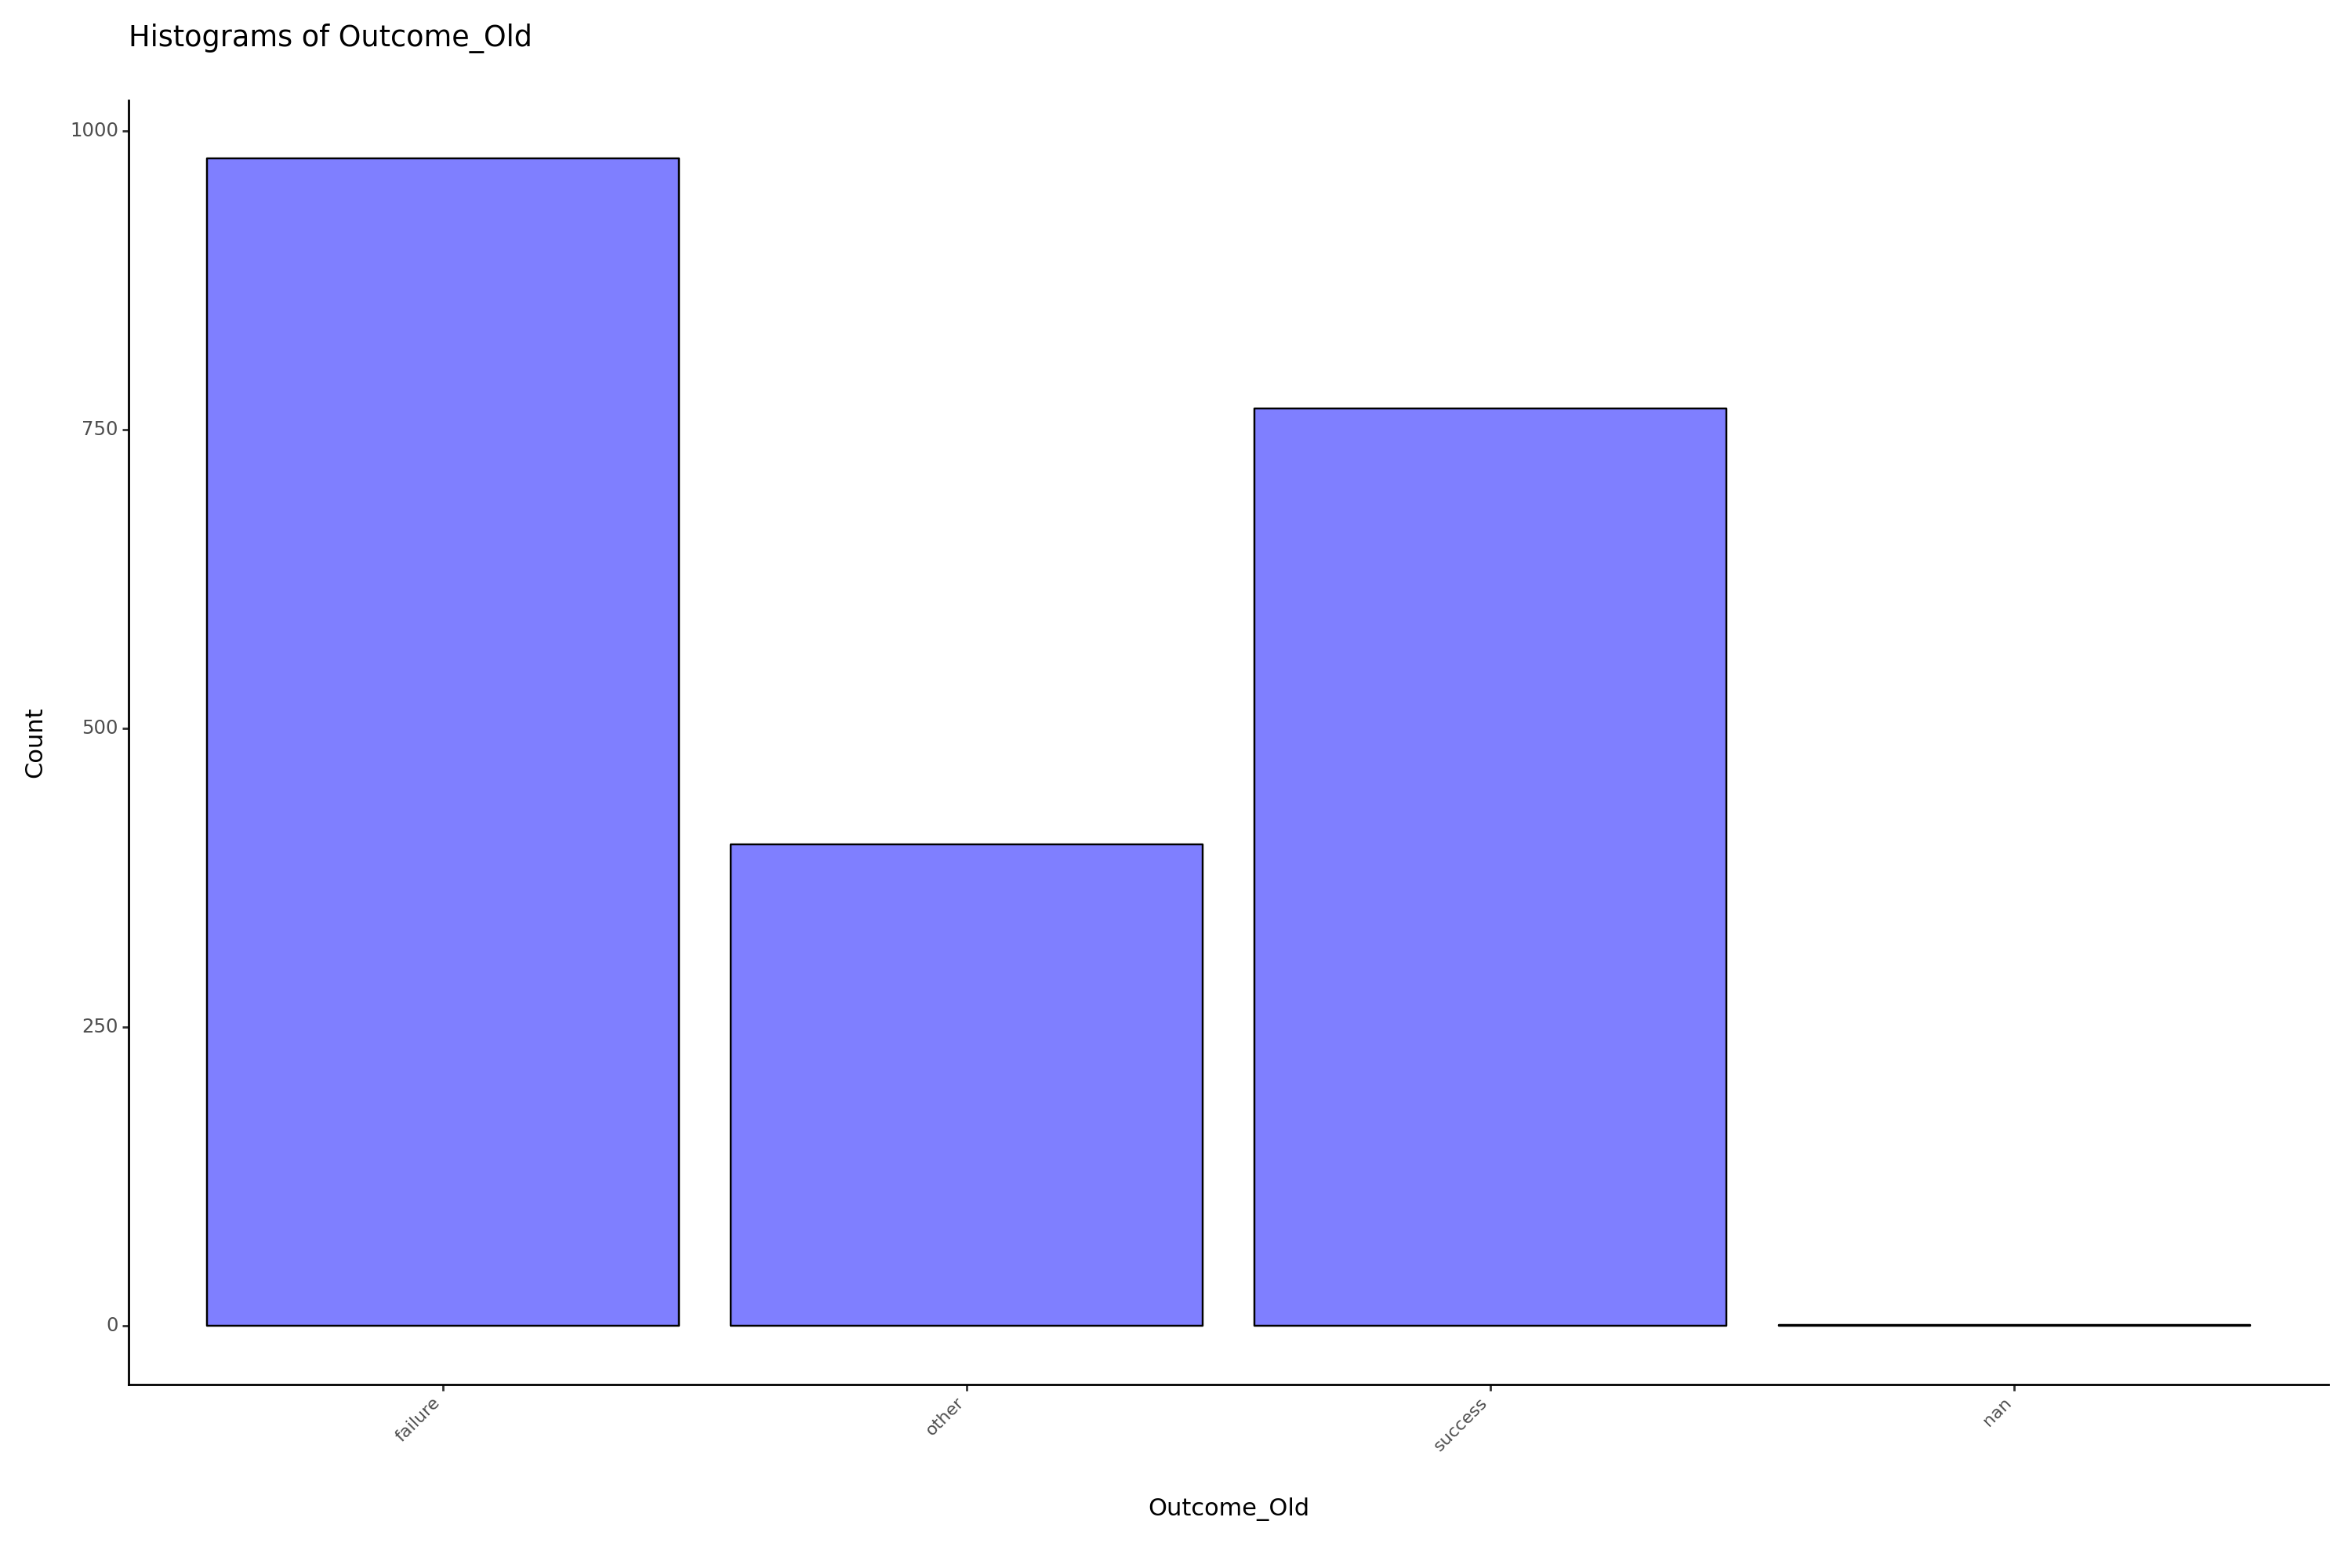

<Figure Size: (1500 x 1000)>

In [26]:

ggplot(campaign_old, aes("outcome_old")) + \
    geom_bar(fill = 'blue', color = 'black', alpha = 0.5) + \
    theme_classic() + \
    theme(subplots_adjust = {'wspace': 0.5, 'hspace': 0.5},
          axis_text_x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
          figure_size = (15, 10),
          axis_title_x = element_text(margin = {'t': 20})) + \
    labs(title = 'Histograms of Outcome_Old',
         x = 'Outcome_Old',
         y = 'Count')


Out of those `outcome_old`, `failure` is the highest category against `success` and `other`. Unfortunately, we do not know what `other` means in this context.

In [21]:
campaign_new = campaign_ad.loc[campaign_ad["days_elapsed_old"] == -1, ]
campaign_new.describe()

,age,subscription,time_spent,banner_views,banner_views_old,days_elapsed_old,X1,X2,X3,X4
count,6803.000000,6803.000000,6803.000000,6803.000000,6803.0,6803.0,6803.000000,6803.000000,6803.000000,6803.000000
mean,41.088049,0.349993,17.450125,2.742467,0.0,-1.0,0.151551,0.016904,0.505218,0.085844
std,11.300747,0.477002,17.839125,3.120928,0.0,0.0,0.358611,0.128922,0.500010,0.028470
min,18.000000,0.000000,0.000000,1.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,5.750000,1.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.073611
50%,39.000000,0.000000,11.100000,2.000000,0.0,-1.0,0.000000,0.000000,1.000000,0.077179
75%,49.000000,1.000000,23.350000,3.000000,0.0,-1.0,0.000000,0.000000,1.000000,0.086726
max,95.000000,1.000000,245.400000,63.000000,0.0,-1.0,1.000000,1.000000,1.000000,0.677937


When considering those that did not have an old subcription, the mean of the response drops from 62.7% to 35%, and banner views increse to roughly 3. 

Throughout each model, there will be additional data exploration such as reviewing correlations, variance inflation factor (VIF), etc.